In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install tweet-preprocessor
import preprocessor as p
import html
from sklearn.pipeline import Pipeline
import re
import string
import nltk
#!pip install emoji
import emoji
import warnings
#!pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
#!pip install gensim
from gensim.models import word2vec
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
#!pip install wordcloud
from wordcloud import WordCloud
nltk.download('wordnet')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_validate, GridSearchCV, KFold
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lorwi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# reading the election data into a dataframe
df_election = pd.read_csv('US_Elections_2020.csv')

In [3]:
# checking the head of the dataframe
df_election.head()

,text,sentiment,negative_reason
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19
3,b'Every 107 seconds an American is dying from ...,1,NaN
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN


In [4]:
#reading the generic tweet data inot a pandas dataframe
df_generic = pd.read_csv('sentiment_analysis.csv')

In [5]:
#checking the head of the dataframe
df_generic.head()

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1


In [6]:
# viweing the a tweet from the generic tweet dataframe
df_generic['text'][1]

'RT @MianUsmanJaved: Congratulations Pakistan on becoming #No1TestTeam in the world against all odds! #JI_PakZindabadRallies https://t.co/1o…'

In [7]:
#making a list that contains only the textual elements from the dataframe of the tweets
generic_list = list(df_generic['text'])
election_list = list(df_election['text'])

### Data Preprocessing

In [8]:
# cleaning the data
#- Remove all html tags and elements
#-Replacing all html character codes with ASCII equivalent
#-Remove all URLs
# if possible try processing emojis, if you can't drop them
#-All characters are transformed to lowercase
# - All stopwords are removed
# leave all tweets that are empty after cleaning
# remove everything else but the words(punctuations, @, #,special characters)

In [9]:
# defining a function to remove html tags from the texts of the tweets
def remove_html_tags(text):
    """Remove html tags from a string"""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
# defining a function to replace all html character codes with ASCII equivalent
def replace_html_CharacterCodes(text):
    """" Replace html Character Codes with ASCII equivalents"""
    h=html
    return (h.unescape(text))
#function removing mentions
def remove_mentions(text):
    no_usertag=re.sub(r"@[\w']+", ' ', text)
    no_whitespacechar = re.sub(r"\\+.",' ', no_usertag)
    return no_whitespacechar 
 # defining a function to remove punctuations
def remove_punctuation(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    remove_numbers = re.sub('[0-9]',' ', nopunc)
    return remove_numbers
# defining a function to process emojis and convert them to words
def process_emoji(text):
    emoji_text = emoji.demojize(text)
    emoji_ammend = re.sub("[_:-]+", " ", emoji_text)
    return emoji_ammend
# defining a function to remove URLs
def remove_URLs(text):
    clean_tweet = re.match('(.*?)http.*?\s?(.*?)', text)
    if clean_tweet: 
        return(clean_tweet.group(1))
    else:
        return text
# remove RT and b
def remove_bRT(text):
    stripped_text = text.lstrip("bRT")
    return(stripped_text)
#defining a function to reove stopwords
def remove_stopwords(text):
    clean_text = [word for word in text.split() if word.lower() not in stopwords]
    return clean_text
# funcion to convert lists to string
def listToString(text):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(text)) 
#function to tokenize the tweets
def tokenize(text):
    tokens = tree_bank_tokenizer.tokenize(text)
    return tokens
# function to lemmatize words from the tweets
def lematize(text):
    new_text = [wnlemmatizer.lemmatize(word) for word in text]
    return new_text

In [10]:
# reading the provided stopwords.txt file to use for removing stopwords
stop_words = open(file = 'stop_words.txt',mode = 'r')
stopwords = stop_words.read()

In [11]:
# creating an instance of the tokenizr and lematizer from the nltk library
tree_bank_tokenizer = nltk.tokenize.TreebankWordTokenizer()
wnlemmatizer = nltk.stem.WordNetLemmatizer()

In [12]:
# a function to apply the cleaning operations apply
def apply_functions(text):
    new_text = text.apply(remove_URLs).apply(remove_html_tags).apply(replace_html_CharacterCodes).apply(remove_mentions).apply(
        process_emoji).apply(remove_punctuation).apply(remove_bRT).map(lambda x: x.lower()).apply(remove_stopwords).apply(
        listToString).apply(tokenize).apply(lematize)
    return new_text

In [13]:
# cleaning the election tweet
df_election['text_clean'] = apply_functions(df_election['text'])

In [14]:
# takes about 12 minutes because it has to process emojis
# cleaning the generic tweet
df_generic['text_clean'] = apply_functions(df_generic['text'])

In [15]:
#cheking the head of dataframe of the cleaned election tweet
df_election.head()

,text,sentiment,negative_reason,text_clean
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,..."
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[lord, sumption, launch, recovery, initiative,..."
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi..."
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[second, american, dying, trumpvirus, donaldtr..."
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[democrat, embrace, diversityandinclusion, cit..."


In [16]:
#cheking the head of dataframe of the cleaned generic tweet
df_generic.head()

,ID,text,label,text_clean
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkins, forward, tab, breeder, crown, ..."
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[congratulation, pakistan, testteam, odds, ji,..."
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[september, maine, mendoza’s, surprise, thanks..."
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[newly, painted, wall, custodial, painter, sum..."
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[excited, july, feschotte, relocating, mbg]"


#### Exploratory Data Analysis

In [17]:
#Design a simple procedure that determines the political party (Republican Party, Democratic Party and Others) of a given tweet 
#and apply this procedure to all the tweets in the 2020 US elections dataset. A suggestion would be to look at relevant words and
#hashtags in the tweets that identify to certain political parties or candidates. What can you say about the distribution of the 
#political affiliations of the tweets?

In [18]:
df_election['text']

0       b'@robreiner so afraid of Nov, Dec, and Jan! E...
1       b"RT @SueC00K: Lord Sumption launches Recovery...
2       b'RT @WalidPhares: Uber Timing: after #Biden a...
3       b'Every 107 seconds an American is dying from ...
4       b'RT @thewebbix: The #Democrats embrace #Diver...
                              ...                        
2547    b'RT @BoycottUtah: It is Friday, October 30, 2...
2548    b'@nowthisnews Delivered today in Montgomery C...
2549    b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...
2550    b'RT @Pale_Ranger: Any ideas why @JoeBiden is ...
2551    b'RT @cazaresforcoc: game time, keep up our mo...
Name: text, Length: 2552, dtype: object

In [19]:
df_election.head(10)

,text,sentiment,negative_reason,text_clean
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,..."
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[lord, sumption, launch, recovery, initiative,..."
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi..."
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[second, american, dying, trumpvirus, donaldtr..."
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[democrat, embrace, diversityandinclusion, cit..."
5,accelerating. &amp; rising when all #Americans...,0,discrimination,"[accelerating, rising, american, killed, trump..."
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,"[dead, american, day, number, died, benghazi, ..."
7,b'#COVID19 #coronavirus #coronavirusuk #COVID ...,1,NaN,"[covid, coronavirus, coronavirusuk, covid, ukl..."
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption,"[reason, rally, losing]"
9,"b""RT @JoeBarri: Anyone who's concerned in the ...",0,covid19,"[concerned, hunterbiden, trump, as, kisser, hu..."


In [20]:
#creating a list of tweets that affiliated with both democrats and republicans
mxd = []
for i in df_election['text']:
    if 'biden' in i.lower() and 'trump' in i.lower():
        mxd.append(i)
    elif 'gop' in i.lower() and 'democrat' in i.lower():
        mxd.append(i)
    elif 'biden' in i.lower() and 'gop' in i.lower():
        mxd.append(i)
    elif 'trump' in i.lower() and 'democrat' in i.lower():
        mxd.append(i)
    elif 'biden' in i.lower() and 'republican' in i.lower():
        mxd.append(i)
    elif 'democrat' in i.lower() and 'republican' in i.lower():
        mxd.append(i)

In [21]:
# creating a list of tweets affiliated with only democrats
dems = []
for i in df_election['text']:
    if i not in mxd:        
        if '#bidenharris' in i.lower() and 'frump' not in i.lower():
            dems.append(i)
        elif 'voted for #joebiden' in i.lower() or  'vote for #joebiden' in i.lower():
            dems.append(i)
        elif '#voteblue' in i.lower() or '#bluewave' in i.lower():
            dems.append(i)
        elif 'voted @joebiden' in i.lower() or 'voted for @joebiden' in i.lower() or 'support for @joebiden' in i.lower():
            dems.append(i)
        elif '#biden2020' in i.lower() and '#trump2020' not in i.lower() and '#bidencorruption' not in i.lower():
            dems.append(i)
        elif 'seniors4biden' in i.lower():
            dems.append(i)
        elif 'joebiden' in i.lower() and 'vote' in i.lower() and 'poll' not in i.lower() and 'nixon' not in i.lower():
            dems.append(i)
        elif 'biden' in i.lower() or 'democrats' in i.lower() or '#democrats' in i.lower():
            dems.append(i)

In [22]:
len(dems)

527

In [23]:
#creating a list of tweets affiliated with only republicans
gop=[]
for i in df_election['text']:
    if i not in mxd:
        if '#TrumpPence' in i:
            gop.append(i)
        elif '#MAGA' in i and 'disgusting' not in i.lower():
            gop.append(i)
        elif '#Trump2020' in i:
            gop.append(i)
        elif 'voted for trump' in i.lower():
            gop.append(i)
        elif 'votered' in i.lower() or 'redwave' in i.lower():
            gop.append(i)
        elif 'votetrump2020' in i.lower():
            gop.append(i)
        elif 'trump' in i.lower() or 'gop' in i.lower() or '#realdonaldtrump' in i.lower() or 'republican' in i.lower():
            gop.append(i)

In [24]:
len(gop)

722

In [25]:
# creating a column in the election dataframe containing the affiliation of each tweet as either republican democrats or other
democrats=dems
republicans = gop
mixed = mxd
df_election['Affiliation'] = pd.Series()
for i in range(len(df_election['text'])):
    if df_election['text'][i] in democrats:
         df_election['Affiliation'][i]= 'Democrat'
    elif df_election['text'][i] in republicans:
         df_election['Affiliation'][i] = 'Republican'
    elif df_election['text'][i] in mixed:
         df_election['Affiliation'][i] = 'Others'
    else:
        df_election['Affiliation'][i] = 'Others'


In [26]:
# viewing the head of the dataframe
df_election.head()

,text,sentiment,negative_reason,text_clean,Affiliation
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,...",Democrat
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[lord, sumption, launch, recovery, initiative,...",Others
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi...",Democrat
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[second, american, dying, trumpvirus, donaldtr...",Others
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[democrat, embrace, diversityandinclusion, cit...",Democrat


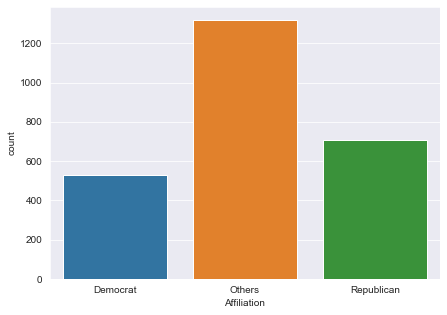

In [27]:
#plotting a countplot to view the count of the contents of the newly created column
plt.figure(figsize=(7,5))
sns.countplot(df_election['Affiliation'])

from the above plot, it can be seen that the majority of the tweets in the election tweets are mainly tweets that are neither solely associated with democrats or republicans. Also, tweeets affiliated with republicans are more than those affiliated with democrats in this dataset. 

In [28]:
#Present a graphical figure (e.g. chart, graph, histogram, boxplot, word cloud, etc) that visualizes some aspect of the generic 
#tweets in sentiment_analysis.csv and another figure for the 2020 US election tweets. All graphs and plots should be readable and have
#all axes that are appropriately labelled.

##### Bonus

In [29]:
# creating a column that contains the length of each tweet in the election tweet dataframe
df_election['length'] =df_election['text'].apply(len)
df_election.head()

,text,sentiment,negative_reason,text_clean,Affiliation,length
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,...",Democrat,131
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[lord, sumption, launch, recovery, initiative,...",Others,134
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi...",Democrat,143
3,b'Every 107 seconds an American is dying from ...,1,NaN,"[second, american, dying, trumpvirus, donaldtr...",Others,142
4,b'RT @thewebbix: The #Democrats embrace #Diver...,1,NaN,"[democrat, embrace, diversityandinclusion, cit...",Democrat,137


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F2144BBE0>,
      dtype=object)

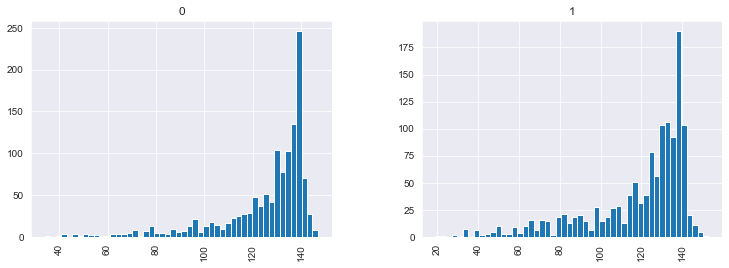

In [30]:
# visualizing the length of the tweets seperated by their sentiment value to understand the relationship between the length of 
#the tweet the sentiment value of the tweet
df_election.hist(column='length', by='sentiment', bins=50,figsize=(12,4))

In [31]:
# creating a column that contains the length of each tweet in the generic tweet dataframe
df_generic['length'] =df_generic['text'].apply(len)
df_generic.head()

,ID,text,label,text_clean,length
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1,"[josh, jenkins, forward, tab, breeder, crown, ...",114
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1,"[congratulation, pakistan, testteam, odds, ji,...",140
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1,"[september, maine, mendoza’s, surprise, thanks...",140
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1,"[newly, painted, wall, custodial, painter, sum...",139
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1,"[excited, july, feschotte, relocating, mbg]",130


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024F01B68A90>,
      dtype=object)

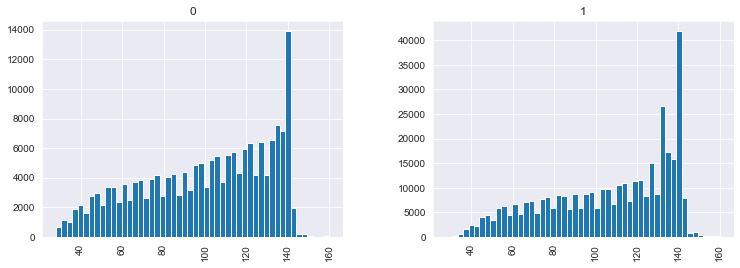

In [32]:
# visualizing the length of the tweets seperated by their sentiment value to understand the relationship between the length of 
#the tweet the sentiment value of the tweet
df_generic.hist(column='length', by='label', bins=50,figsize=(12,4))

##### creating a visualization of the word cloud of both the generic and election tweets

In [33]:
# converting the list of the words into a string of the words to create a word cloud of the words
election=' '.join(df_election['text_clean'].apply(listToString))
generic = ' '.join(df_generic['text_clean'].apply(listToString))

In [34]:
# generating the word cloud of the election tweet
wordcloud_election = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(election)

In [35]:
# generating a word cloud of the generic tweet
wordcloud_generic= WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(generic)

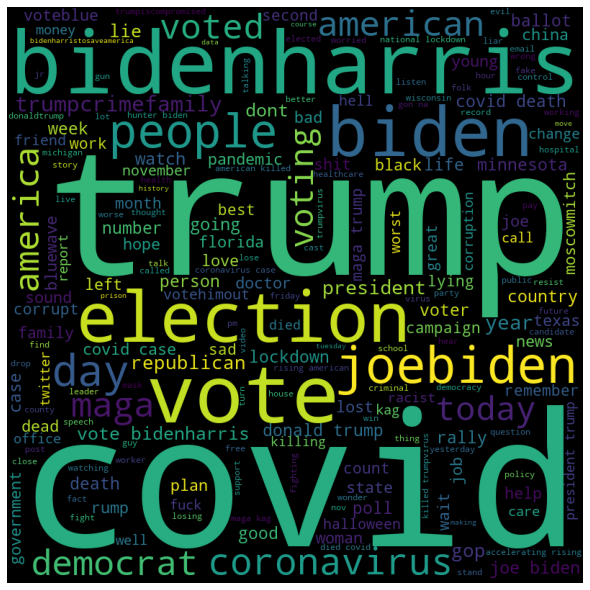

In [36]:
# visualizing the generated word cloud of the election tweets
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_election) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

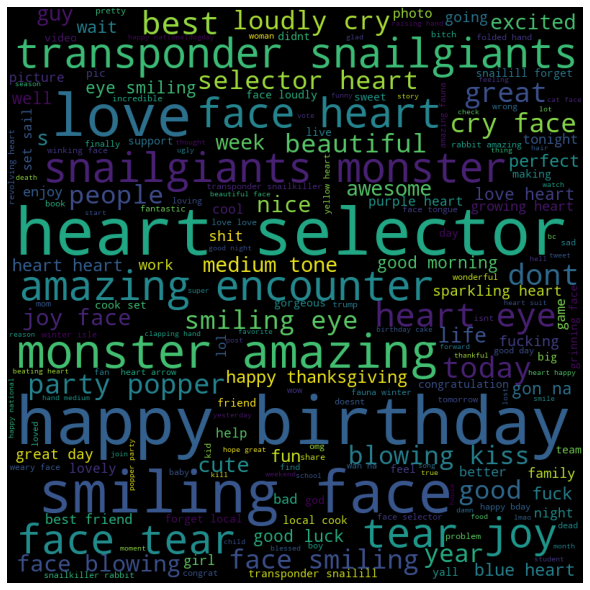

In [37]:
# visualzing the generated word cloud of the generic tweets
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_generic) 
plt.axis("off") 
plt.tight_layout(pad = 0) 


## Model Preparation

In [38]:
# checking to see if the classes of the generic tweets are balanced
df_generic['label'].value_counts(normalize=True)

1    0.674686
0    0.325314
Name: label, dtype: float64

In [39]:
# reading in the corpus.txt file to use for the creation of the vocabulary of features that would be used for training 
# and testing of the sentiment prediction models used in this report
text_corpus = open('corpus.txt','r',encoding='utf8')
corpus = text_corpus.read()
X_ = lematize(re.sub('[^a-zA-Z]', ' ',corpus).split())

In [40]:
# preparing the train and test data
X = df_generic['text_clean'].apply(listToString)
y = df_generic['label']
X_election = df_election['text_clean'].apply(listToString)
y_election = df_election['sentiment']

In [41]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [42]:
# creating and transforming words into bag of words features/term frequencies
bow_transformer = CountVectorizer(max_features=3000)
#bow_fit_corpus = bow_transformer.fit_transform(X_)
word_frequency = bow_transformer.fit_transform(X_train)
word_frequency_test = bow_transformer.transform(X_test)
word_frequency_election = bow_transformer.transform(X_election)

In [43]:
#creating and transforming the term frequwncies into tfidf features
tfidf_transformer = TfidfTransformer()
#corpus_tfidf =tfidf_transformer.fit_transform(bow_fit_corpus)
X_tfidf = tfidf_transformer.fit_transform(word_frequency)
X_test_tfidf = tfidf_transformer.transform(word_frequency_test)
X_election_tfidf = tfidf_transformer.transform(word_frequency_election)

### Model Implementation

### Logistic Regression Model

##### Logistiic Regression model with l1 regularization

<a href="https://otppb.wd3.myworkdayjobs.com/en-US/OntarioTeachers_Careers/job/Toronto-Canada/New-Grad---Data-Analyst--Business-Insights---Analytics--18-month-contract-_3174/apply?clientRequestID=e28524f772ca4b6f9ebe6b92f5ce67ab"> 
here

In [44]:
param_grid_l1 = {'solver': ['liblinear','saga' ],
                 'C': [0.5,1.0,10.0,12.0,15.0,20.0]}
folds = KFold(n_splits = 5, random_state=1)
param_search_l1 = GridSearchCV(estimator=LogisticRegression(penalty='l1'),param_grid=param_grid_l1,n_jobs=4,cv=folds,verbose=1)
param_search_l1.fit(word_frequency,y_train)
print('Best Score is:', param_search_l1.best_score_, 'and Best model is:', param_search_l1.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 83.2min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed: 183.1min finished


Best Score is: 0.9330318996056448 and Best model is: LogisticRegression(penalty='l1', solver='liblinear')


In [45]:
# runs for about 30 minutes
param_grid_l11= {'solver': ['liblinear','saga' ],
                 'C': [0.5,1.0,10.0,15.0,20.0]}
param_searchl11 = GridSearchCV(estimator=LogisticRegression(penalty='l1'),param_grid=param_grid_l11,n_jobs=4,cv=folds,verbose=1)
param_searchl11.fit(X_tfidf,y_train)
print('Best Score is: ',param_searchl11.best_score_, 'and the Best model is: ', param_searchl11.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 324.3min
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed: 336.0min finished


Best Score is:  0.9336184963254185 and the Best model is:  LogisticRegression(penalty='l1', solver='liblinear')


In [73]:
param_searchl11.best_params_

{'C': 1.0, 'solver': 'liblinear'}

#### Logistic Regression Model with L2 Regularization

In [68]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag','saga' ],
              'C': [ 0.1,0.5,1.0,10.0,12.0,15.0]}

param_search = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,n_jobs=4,cv=folds,verbose=1)
param_search.fit(word_frequency,y_train)
print('Best Score is:', param_search.best_score_, 'and Best model is:', param_search.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  7.0min finished


Best Score is: 0.9330370909723913 and Best model is: LogisticRegression()


In [69]:
param_search.best_params_

{'C': 1.0, 'solver': 'lbfgs'}

In [47]:
param_grid = {'solver': ['newton-cg', 'lbfgs', 'sag','saga' ],
              'C': [0.1,0.5,1.0,10.0,12.0,15.0]}

param_search1 = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,n_jobs=4,cv=folds,verbose=1)
param_search1.fit(X_tfidf,y_train)
print('Best Score for Logistic Regression is: ',param_search1.best_score_, 'and the Best Logistic Regression model is: ',
      param_search1.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   45.2s
[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  3.1min finished


Best Score for Logistic Regression is:  0.933143508668498 and the Best Logistic Regression model is:  LogisticRegression(C=10.0, solver='newton-cg')


#### KNN CLASSIIFIER

###### Tuning Knn hyperparameters takes a lot of time

In [65]:
# knn takes a lot of time to run
n_neighbours = [5,11,15,21,31]
folds = KFold(n_splits = 5, random_state=1)
for i in n_neighbours:
    model = KNeighborsClassifier(n_neighbors = i,n_jobs=-1)
    cross_valknn= cross_validate(estimator=model,X=word_frequency,y=y_train,cv=folds)
    mean_cvscore_knn = cross_valknn['test_score'].mean()
    std_cvscore_knn = cross_valknn['test_score'].std()
    print('for a K of ', i ,'mean accuracy score is ' , mean_cvscore_knn,'and the standard deviation across folds is ',
          std_cvscore_knn)   

for a K of  5 mean accuracy score is  0.8925670837479952 and the standard deviation across folds is  0.0010804352783989183
for a K of  11 mean accuracy score is  0.8964137127273322 and the standard deviation across folds is  0.0013639064451358913
for a K of  15 mean accuracy score is  0.8968315990553684 and the standard deviation across folds is  0.00144810910729069
for a K of  21 mean accuracy score is  0.8968964884786015 and the standard deviation across folds is  0.0018349541976632822
for a K of  31 mean accuracy score is  0.8954455707288795 and the standard deviation across folds is  0.0014833922739160943


In [66]:
n_neighbours = [5,11,15,21,31]
folds = KFold(n_splits = 5, random_state=1)
for i in n_neighbours:
    model = KNeighborsClassifier(n_neighbors = i,n_jobs=-1)
    cross_valknn1= cross_validate(estimator=model,X=X_tfidf,y=y_train,cv=folds)
    mean_cvscore_knn1 = cross_valknn1['test_score'].mean()
    std_cvscore_knn1 = cross_valknn1['test_score'].std()
    print('for a K of ', i ,'mean accuracy score is ' , mean_cvscore_knn1,'and the standard deviation across folds is ',
          std_cvscore_knn1)   

for a K of  5 mean accuracy score is  0.8358878010287059 and the standard deviation across folds is  0.0009594821393112778
for a K of  11 mean accuracy score is  0.8338684550628009 and the standard deviation across folds is  0.0010265760497573605
for a K of  15 mean accuracy score is  0.8315272585735931 and the standard deviation across folds is  0.0014416311758431504
for a K of  21 mean accuracy score is  0.829313247167512 and the standard deviation across folds is  0.0016711330377949785
for a K of  31 mean accuracy score is  0.8248955963433916 and the standard deviation across folds is  0.001803748360679393


#### NAIVE BAYES CLASSIFIER

In [48]:
naivebayes =  MultinomialNB()
cross_valNB = cross_validate(estimator=naivebayes,X=word_frequency,y=y_train,cv=folds)
cvmean_accuracyNB = cross_valNB['test_score'].mean()
cvstd_accuracyNB = cross_valNB['test_score'].std()
print(cvmean_accuracyNB,cvstd_accuracyNB)

0.9135184644254071 0.00045697973639458836


In [49]:
naivebayes =  MultinomialNB()
cross_valNB1 = cross_validate(estimator=naivebayes,X=X_tfidf,y=y_train,cv=folds)
cvmean_accuracyNB1 = cross_valNB1['test_score'].mean()
cvstd_accuracyNB1 = cross_valNB1['test_score'].std()
print(cvmean_accuracyNB1,cvstd_accuracyNB1)

0.9049660861679063 0.0012246700949579076


In [50]:
y_train.value_counts(normalize=True)

1    0.674664
0    0.325336
Name: label, dtype: float64

#### SUPPORT VECTOR CLASSIFIER

In [51]:
param_gridSVC = {'penalty': ['l1','l2'],
                'C': [0.1,0.3,0.5,0.7,1.0,10.0]}
param_searchSVC = GridSearchCV(estimator = LinearSVC(random_state=1) ,param_grid = param_gridSVC, cv= folds,n_jobs=4,verbose=1)
param_searchSVC.fit(word_frequency,y_train)
print('Best Score for SVC is: ',param_searchSVC.best_score_, 'and the Best parameters for the model are: ',
      param_searchSVC.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  5.9min finished


Best Score for SVC is:  0.9323674352478802 and the Best parameters for the model are:  {'C': 0.1, 'penalty': 'l2'}


In [52]:
param_gridSVC = {'penalty': ['l1','l2'],
                'C': [0.1,0.5,1.0,1.5,10.0]}
param_searchSVC1 = GridSearchCV(estimator = LinearSVC(random_state=1) ,param_grid = param_gridSVC, cv= folds,n_jobs=4,verbose=1)
param_searchSVC1.fit(X_tfidf,y_train)
print('Best Score for SVC is: ',param_searchSVC1.best_score_, 'and the Best parameters for the model are: ', 
      param_searchSVC1.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  43 out of  50 | elapsed:   14.7s remaining:    2.3s
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:   46.8s finished


Best Score for SVC is:  0.9327204325569008 and the Best parameters for the model are:  {'C': 0.5, 'penalty': 'l2'}


#### DECISION TREE CLASSIFIER

In [53]:
param_gridDT = { "min_samples_split": [ 5, 10,15],
                "max_depth": [50,150,200],
                "max_leaf_nodes": [100,150,200]}
folds = KFold(n_splits = 5, random_state=1)
param_searchDT = GridSearchCV(estimator = DecisionTreeClassifier(criterion='entropy') ,param_grid = param_gridDT, 
                              cv= folds,n_jobs=4,verbose=1)
param_searchDT.fit(word_frequency,y_train)
print('Best Score for DT is: ',param_searchDT.best_score_, 'and the Best parameters for the model is: ', 
      param_searchDT.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.5min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed: 12.7min finished


Best Score for DT is:  0.8847466631065874 and the Best parameters for the model is:  {'max_depth': 200, 'max_leaf_nodes': 200, 'min_samples_split': 5}


In [54]:
param_gridDT = { "min_samples_split": [5, 10,15],
                "max_depth": [50, 150, 200],
                "max_leaf_nodes": [50, 150, 200]}
param_searchDT1 = GridSearchCV(estimator = DecisionTreeClassifier(criterion='entropy') ,param_grid = param_gridDT,
                               cv= folds,n_jobs=4,verbose=1)
param_searchDT1.fit(X_tfidf,y_train)
print('Best Score for DT is: ',param_searchDT1.best_score_, 'and the Best parameters for the model is: ', 
      param_searchDT1.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.9min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed: 19.5min finished


Best Score for DT is:  0.8848790356153389 and the Best parameters for the model is:  {'max_depth': 200, 'max_leaf_nodes': 200, 'min_samples_split': 5}


#### Random Forest

In [55]:
model_RF = RandomForestClassifier()
param_gridRF = {"n_estimators": [5, 10, 20, 30, 40,],
              "max_depth": [20, 50, 100],
              "bootstrap": [True, False] }
grid_searchRF = GridSearchCV(estimator = model_RF, param_grid=param_gridRF, n_jobs=4, refit=True, verbose=1, cv=folds)
grid_searchRF.fit(word_frequency, y_train)
print('Best Score for Random Forest is: ',grid_searchRF.best_score_, 'and the Best parameters for the model are: ',
      grid_searchRF.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 49.2min finished


Best Score for Random Forest is:  0.8874122979875974 and the Best parameters for the model are:  {'bootstrap': True, 'max_depth': 100, 'n_estimators': 30}


In [58]:
model_RF = RandomForestClassifier()
param_gridRF1 = {"n_estimators": [5, 10, 20, 30, 40, 50],
              "max_depth": [20, 50, 100],           
              "bootstrap": [True, False] }
grid_searchRF1 = GridSearchCV(estimator = model_RF, param_grid=param_gridRF1, n_jobs=4, refit=True, verbose=1, cv=folds)
grid_searchRF1.fit(X_tfidf, y_train)
print('Best Score for Random Forest is: ',grid_searchRF1.best_score_, 'and the Best parameters for the model are: ',
      grid_searchRF1.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 35.1min finished


Best Score for Random Forest is:  0.8831217720518646 and the Best parameters for the model are:  {'bootstrap': True, 'max_depth': 100, 'n_estimators': 40}


#### XGBOOST

In [64]:
param_grid_xgb = {'n_estimators': [60,80,100],
                 'max_depth': [50,100,150],
                #  'sampling_method':['uniform', 'gradient_based'],
                 # 'tree_method': ['approx', 'hist'],
                 'learning_rate':[0.5,1.0]}
                 #'lambda': [0,0.5,1.0],
                # 'alpha': [0,0.5,1.0]
param_searchXGB = GridSearchCV(estimator =XGBClassifier(),param_grid = param_grid_xgb, cv= folds,n_jobs=4,verbose=1)
param_searchXGB.fit(word_frequency,y_train)
print('Best Score for SVC is: ',param_searchXGB.best_score_, 'and the Best parameters for the model are: ', param_searchXGB.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 64.4min
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed: 153.6min finished


Best Score for SVC is:  0.9358221277264753 and the Best parameters for the model are:  {'learning_rate': 0.5, 'max_depth': 100, 'n_estimators': 100}


In [62]:
param_grid_xgb = {'n_estimators': [60,80,100],
                 'max_depth': [50,100,150],
                  #'sampling_method':['uniform', 'gradient_based'],
                  #'tree_method': ['approx', 'hist', 'gpu_hist'],
                 'learning_rate':[0.5,1.0,1.5]}
param_searchXGB1 = GridSearchCV(estimator =XGBClassifier(),param_grid = param_grid_xgb, cv= folds,n_jobs=4,verbose=1)
param_searchXGB1.fit(X_tfidf,y_train)
print('Best Score for XGBoost is: ',param_searchXGB1.best_score_, 'and the Best parameters for the model are: ', param_searchXGB1.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 159.3min
[Parallel(n_jobs=4)]: Done 135 out of 135 | elapsed: 466.2min finished


Best Score for SVC is:  0.933369327328189 and the Best parameters for the model are:  {'learning_rate': 0.5, 'max_depth': 100, 'n_estimators': 100}


#### PREDICTIONS

##### Word Frequency 

In [44]:
# creating and fitting the seven models using the hyperparameters chosen and fitting the model to the training set.
best_logistic_model = LogisticRegression(C=1.0, solver='lbfgs')
best_logistic_model.fit(word_frequency,y_train)
best_knn_model = KNeighborsClassifier(n_neighbors=21,n_jobs=-1)
best_knn_model.fit(word_frequency,y_train)
best_naive_bayes_model = MultinomialNB()
best_naive_bayes_model.fit(word_frequency,y_train)
best_SVM_model = LinearSVC(C= 0.1,random_state=1)
best_SVM_model.fit(word_frequency,y_train)
best_DT_model = DecisionTreeClassifier(max_depth= 200, max_leaf_nodes= 200, min_samples_split= 5)
best_DT_model.fit(word_frequency,y_train)
best_RF_model =  RandomForestClassifier(bootstrap = True, max_depth =100, n_estimators =30)
best_RF_model.fit(word_frequency,y_train)
best_XGB_model = XGBClassifier(learning_rate= 0.5,max_depth= 100,n_estimators =100)
best_XGB_model.fit(word_frequency,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
#it takes time to run
# score on test data
logistic_score = best_logistic_model.score(word_frequency_test,y_test)
knn_score = best_knn_model.score(word_frequency_test,y_test)
naive_bayes_score = best_naive_bayes_model.score(word_frequency_test,y_test)
SVM_score = best_SVM_model.score(word_frequency_test,y_test)
DT_score = best_DT_model.score(word_frequency_test,y_test)
RF_score = best_RF_model.score(word_frequency_test,y_test)
XGB_score = best_XGB_model.score(word_frequency_test,y_test)
score_dict = {'Logistic Regression': logistic_score,'KNN': knn_score,'Naive Bayes': naive_bayes_score,'SVM':SVM_score,
              'Decision Tree': DT_score,'Random Forest': RF_score,'XGBoost': XGB_score}
series_wf_score = pd.Series(score_dict)
df_wf_score = pd.DataFrame(series_wf_score)

In [46]:
df_wf_score.sort_values(by = 0, ascending=False)

,0
XGBoost,0.936488
Logistic Regression,0.932654
SVM,0.932206
Naive Bayes,0.914455
KNN,0.897491
Decision Tree,0.885203
Random Forest,0.869493


Model with the best performance using the word_frequency feature is XGBoost 

##### TFIDF

In [47]:
best_logistic_model1 = LogisticRegression(C= 1.0, solver='liblinear', penalty='l1')
best_logistic_model1.fit(X_tfidf,y_train)
best_knn_model1 = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
best_knn_model1.fit(X_tfidf,y_train)
best_naive_bayes_model1 = MultinomialNB()
best_naive_bayes_model1.fit(X_tfidf, y_train)
best_SVM_model1 = LinearSVC(C= 0.5 ,random_state=1)
best_SVM_model1.fit(X_tfidf, y_train)
best_DT_model1 = DecisionTreeClassifier(max_depth= 200, max_leaf_nodes =200, min_samples_split = 5)
best_DT_model1.fit(X_tfidf, y_train)
best_RF_model1 = RandomForestClassifier(bootstrap = True, max_depth =  100, n_estimators =  40)
best_RF_model1.fit(X_tfidf, y_train)
best_XGB_model1 = XGBClassifier(learning_rate = 0.5, max_depth = 100, n_estimators = 100)
best_XGB_model1.fit(X_tfidf, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
# score on test data
logistic_score1 = best_logistic_model1.score(X_test_tfidf,y_test)
knn_score1 = best_knn_model1.score(X_test_tfidf,y_test)
naive_bayes_score1 = best_naive_bayes_model1.score(X_test_tfidf,y_test)
SVM_score1 = best_SVM_model1.score(X_test_tfidf,y_test)
DT_score1 = best_DT_model1.score(X_test_tfidf,y_test)
RF_score1 = best_RF_model1.score(X_test_tfidf,y_test)
XGB_score1 = best_XGB_model1.score(X_test_tfidf,y_test)
score_dict1 = {'Logistic Regression': logistic_score1,'KNN': knn_score1,'Naive Bayes': naive_bayes_score1,'SVM':SVM_score1,
               'Decision Tree': DT_score1, 'Random Forest': RF_score1, 'XGBoost': XGB_score1}
Series_tfidf_score = pd.Series(score_dict1)
df_tfidf_score = pd.DataFrame(Series_tfidf_score, columns=['Accuracy'])

In [49]:
df_tfidf_score.sort_values(by = 'Accuracy', ascending = False)

,Accuracy
XGBoost,0.934459
Logistic Regression,0.933284
SVM,0.932382
Naive Bayes,0.906213
Decision Tree,0.885197
Random Forest,0.881600
KNN,0.842410


#### Testing the best model on the election data set

In [50]:
#Evaluate the same model with best performance on the 2020 US elections data.
#How well do your predictions match the sentiment labelled in the 2020 US elections data?

#### Word Frequency

In [51]:
best_model_wf = best_XGB_model
score_election = best_model_wf.score(word_frequency_election,y_election)
print('The Model with the best performance has an accuracy of ', score_election, ' on the election tweet dataset using the word',
     'frequency features')

The Model with the best performance has an accuracy of  0.655564263322884  on the election tweet dataset using the word frequency features


From the accuracy score obtained from testing the model with the best performance on the US election tweet dataset, the model seems to be able to predict the true sentiment of the 2020 US election tweet accurately by 65.56%. So therefore the predictions of my best model match the sentiment labelled in the 2020 US elections data with an accuracy score of 65.56%. My best model accurately predicts the true sentiment of the US election data 65.56% of the time using the word frequency feature

In [52]:
y_pred_wf = best_model_wf.predict(word_frequency_election)
conf_wf = confusion_matrix(y_election,y_pred_wf)
class_report = classification_report(y_election, y_pred_wf)
print('Confusion Matrix Word Frequency features \n', conf_wf)
print('Classification_report Word Frequency features \n', class_report)

Confusion Matrix Word Frequency features 
 [[1150  114]
 [ 765  523]]
Classification_report Word Frequency features 
               precision    recall  f1-score   support

           0       0.60      0.91      0.72      1264
           1       0.82      0.41      0.54      1288

    accuracy                           0.66      2552
   macro avg       0.71      0.66      0.63      2552
weighted avg       0.71      0.66      0.63      2552



Also, From the above confusion matrix, it can be seen that the model assigns the wrong sentiment (114+765) tweets from the US election data and predicts the true sentiment for the remaining other tweets

#### TFIDF

In [53]:
best_model_tfidf = best_XGB_model1
score_election1 = best_model_tfidf.score(X_election_tfidf,y_election)
print('The Model with the best performance has an accuracy of ', score_election1, ' on the election tweet dataset using the term',
     'frequency inverse document frequency features')

The Model with the best performance has an accuracy of  0.6359717868338558  on the election tweet dataset using the term frequency inverse document frequency features


In [54]:
y_pred_tfidf = best_model_tfidf.predict(X_election_tfidf)
conf_tfidf = confusion_matrix(y_election,y_pred_tfidf)
class_report1 = classification_report(y_election, y_pred_tfidf)
print('Confusion Matrix tfidf features \n', conf_tfidf)
print('Classification_report tfidf features \n', class_report1)

Confusion Matrix tfidf features 
 [[1131  133]
 [ 796  492]]
Classification_report tfidf features 
               precision    recall  f1-score   support

           0       0.59      0.89      0.71      1264
           1       0.79      0.38      0.51      1288

    accuracy                           0.64      2552
   macro avg       0.69      0.64      0.61      2552
weighted avg       0.69      0.64      0.61      2552



From the above confusion matrix, it can be seen that the model assigns the wrong sentiment (796+133) tweets from the US election data and predicts the true sentiment for the remaining other tweets. 

In [55]:
#Choose the model that has the best performance and visualize sentiment prediction results and the true sentiment
#for each of the two parties/candidates. 
#Discuss whether NLP analytics based on tweets is useful for political parties during election campaigns

In [56]:
df_election['Pred_tfidf'] = pd.Series(y_pred_tfidf)
df_election['Pred_wf'] = pd.Series(y_pred_wf)

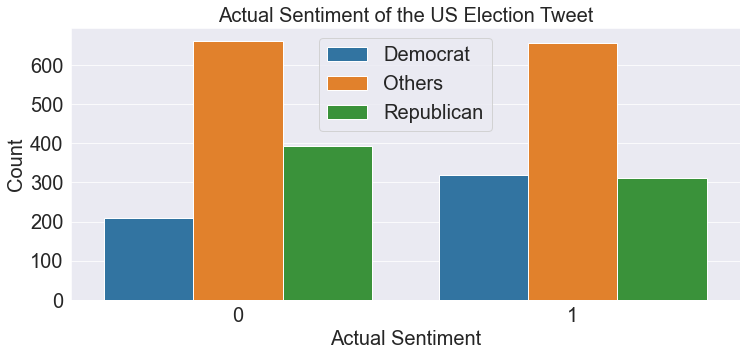

In [105]:
plt.figure(figsize=(12,5))
sns.countplot(df_election['sentiment'],hue=df_election.Affiliation)
plt.title('Actual Sentiment of the US Election Tweet', fontsize = 20)
plt.xlabel('Actual Sentiment', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

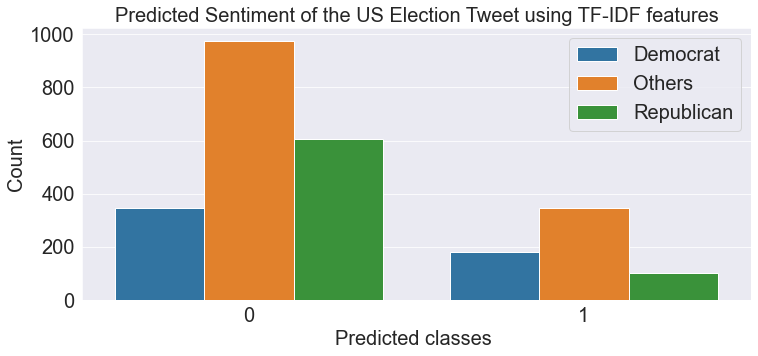

In [104]:
plt.figure(figsize=(12,5))
sns.countplot(df_election['Pred_tfidf'], hue = df_election.Affiliation)
plt.title('Predicted Sentiment of the US Election Tweet using TF-IDF features', fontsize=20)
plt.xlabel('Predicted classes ',fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

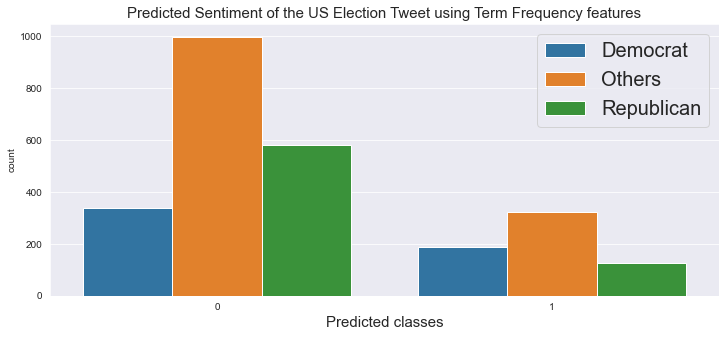

In [103]:
plt.figure(figsize=(12,5))
sns.countplot(df_election['Pred_wf'], hue = df_election.Affiliation)
plt.title('Predicted Sentiment of the US Election Tweet using Term Frequency features', fontsize=15)
plt.xlabel('Predicted classes',fontsize=15)
plt.legend(fontsize=20)

Based on the above visualization, it can be seen that with both the actual and predicted sentiments (with both Term Frequency features and TFIDF features) of the tweets, the political party that has the majority of tweets with negative sentiment is the Republican party. In addition, the number of tweets wih positive sentiment for both parties are close, with tweets affiliated with democrats being slightly higher than that of those affiliated with republicans

NLP analytics based on tweets is useful for political parties during election campaigns because analysing the sentiment  associated with tweets can help a political party know what the opinion of the public is towards the political candidate and party, and with appropriate analytics and data, a political party can know areas where they need to touch bases and improve on as they campaign for election. The Republican and Democratic party used in this analysis had approximately equal positive sentiments, but Republican had much more negative sentiment tweets affiliated with them which may explain the election turn-up where Republicans had lots of vote for the presidential election; however Democrats had more of the votes both based on electoral collage and the most popular votes.

#### PART 4B

In [60]:
neg_election_df = df_election[df_election.sentiment==0]

In [61]:
neg_election_df

,text,sentiment,negative_reason,text_clean,Affiliation,length,Pred_tfidf,Pred_wf
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,...",Democrat,131,0,0
1,"b""RT @SueC00K: Lord Sumption launches Recovery...",0,others,"[lord, sumption, launch, recovery, initiative,...",Others,134,1,1
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi...",Democrat,143,0,0
5,accelerating. &amp; rising when all #Americans...,0,discrimination,"[accelerating, rising, american, killed, trump...",Republican,97,0,0
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,"[dead, american, day, number, died, benghazi, ...",Republican,135,0,0
...,...,...,...,...,...,...,...,...
2542,b'love is in the air rather watch this than wa...,0,crime,"[love, air, watch, watch, news, brainwashing, ...",Others,121,1,1
2543,b'RT @EUinAus: has challenged humanity. The ye...,0,discrimination,"[challenged, humanity, year, covid, faultlines...",Others,123,0,0
2544,b'Ty flips off Dump every day for 4 years. 4 m...,0,covid19,"[flip, dump, day, year, day, resist, maga, cov...",Others,116,1,0
2549,b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...,0,covid19,"[duhnnie, jr, lied, fox, number, covid, death]",Republican,140,0,0


In [62]:
#preparing the dataset
Le = LabelEncoder()
neg_reason = y1 =  Le.fit_transform(neg_election_df['negative_reason'])
X_election_ = neg_election_df['text_clean'].apply(listToString)
X1 = X_election_

In [63]:
# preprocessing and splitting the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.30, random_state = 0)
cv_neg = CountVectorizer()
cv_neg.fit(X_train1)
X_train_wf = cv_neg.transform(X_train1)
X_test_wf = cv_neg.transform(X_test1)
tfidf_transform = TfidfTransformer()
tfidf_Xtrain = tfidf_transform.fit_transform(X_train_wf)
tfidf_Xtest = tfidf_transform.transform(X_test_wf)

#### Model Implementation

#### Logistic Regression

In [64]:
param_grid_lg1 = {'solver': ['liblinear','saga' ],
                 'C': [0.5,1.0,10.0,12.0,15.0,20.0]}
folds = KFold(n_splits = 10, random_state=1)
param_search_lg1 = GridSearchCV(estimator=LogisticRegression(penalty='l1'),param_grid=param_grid_lg1,n_jobs=4,cv=folds,verbose=1)
param_search_lg1.fit(tfidf_Xtrain,y_train1)
print('Best Score is:', param_search_lg1.best_score_, 'and Best model is:', param_search_lg1.best_estimator_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  65 tasks      | elapsed:   43.3s


Best Score is: 0.33711695607763026 and Best model is: LogisticRegression(penalty='l1', solver='saga')


[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:  2.4min finished


In [65]:
param_gridlg2 = {'solver': ['newton-cg', 'lbfgs', 'sag','saga' ],
              'C': [ 0.1,0.5,1.0,10.0,12.0,15.0]}
folds = KFold(n_splits = 10, random_state=1)
param_searchlg2 = GridSearchCV(estimator=LogisticRegression(),param_grid=param_gridlg2,n_jobs=4,cv=folds,verbose=1)
param_searchlg2.fit(tfidf_Xtrain,y_train1)
print('Best Score is:', param_searchlg2.best_score_, 'and Best model is:', param_searchlg2.best_estimator_)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Done  76 tasks      | elapsed:    1.7s


Best Score is: 0.36542390194075586 and Best model is: LogisticRegression(solver='newton-cg')


[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   10.7s finished


In [66]:
log_reg_best_acc = max(param_search_lg1.best_score_,param_searchlg2.best_score_)

#### Naive Bayes

In [67]:
naivebayes =  MultinomialNB()
folds = KFold(n_splits = 10, random_state=1)
param_gridNB = {'alpha': [0,0.5,1.0],
               'fit_prior': [True, False]}
GridsearchNB = GridSearchCV(estimator = naivebayes, param_grid = param_gridNB, cv = folds, n_jobs=4,verbose=1)
GridsearchNB.fit(tfidf_Xtrain,y_train1)
print('Best score for Naive Bayes is: ', GridsearchNB.best_score_, 'and the Best parameters for the model is: ',
      GridsearchNB.best_params_)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best score for Naive Bayes is:  0.3484933605720123 and the Best parameters for the model is:  {'alpha': 1.0, 'fit_prior': True}


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  53 out of  60 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:    0.0s finished


#### XGBoost Classifier

In [68]:
param_grid_xgb = {'n_estimators': [10,50,80],
                 'max_depth': [20,40,60],
                  #'sampling_method':['uniform', 'gradient_based'],
                  #'tree_method': ['approx', 'hist', 'gpu_hist'],
                 'learning_rate':[0.2,0.4,0.5,1.0,1.5]}
param_searchXGB2 = GridSearchCV(estimator =XGBClassifier(),param_grid = param_grid_xgb, cv= folds,n_jobs=4,verbose=1)
param_searchXGB2.fit(tfidf_Xtrain,y_train1)
print('Best Score for XGBoost is: ',param_searchXGB2.best_score_, 'and the Best parameters for the model are: ', param_searchXGB2.best_params_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  5.8min
[Parallel(n_jobs=4)]: Done 450 out of 450 | elapsed:  5.9min finished


Best Score for XGBoost is:  0.30545199182839633 and the Best parameters for the model are:  {'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 80}


#### SVM Classifier

In [69]:
param_gridSVC_ = {'penalty': ['l1','l2'],
                'C': [0.01,0.05,0.1,0.5,1.0,10.0]}
param_searchSVC_ = GridSearchCV(estimator = LinearSVC(random_state=1) ,param_grid = param_gridSVC_, cv= folds,n_jobs=4,verbose=1)
param_searchSVC_.fit(tfidf_Xtrain,y_train1)
print('Best Score for SVC is: ',param_searchSVC_.best_score_, 'and the Best parameters for the model are: ',
      param_searchSVC_.best_params_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Best Score for SVC is:  0.36090398365679266 and the Best parameters for the model are:  {'C': 0.1, 'penalty': 'l2'}


[Parallel(n_jobs=4)]: Done 120 out of 120 | elapsed:    0.5s finished


In [70]:
#combining the model accuracies
models_accuracy = {'Logistic Regression': log_reg_best_acc, 'Naive Bayes': GridsearchNB.best_score_,
          'SVM Classifier': param_searchSVC_.best_score_}
df_2 = pd.DataFrame(pd.Series(models_accuracy), columns=['Accuracy'])

In [71]:
# sorting the accuracy to get the model with the highest accuracy
df_2.sort_values(by='Accuracy', ascending=False)

,Accuracy
Logistic Regression,0.365424
SVM Classifier,0.360904
Naive Bayes,0.348493


##### Using the best model on the test set

In [72]:
best_model = LogisticRegression(C = 1.0, solver='newton-cg')
best_model.fit(tfidf_Xtrain,y_train1)
accuracy = best_model.score(tfidf_Xtest,y_test1)

In [73]:
best_model.score(tfidf_Xtrain,y_train1)

0.8619909502262444

In [74]:
# accuracy of the best model on the test set
print(accuracy)

0.3526315789473684


In [75]:
# obtaining the model's class predictions
predictions = best_model.predict(tfidf_Xtest)

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 8 Text major ticklabel objects>)

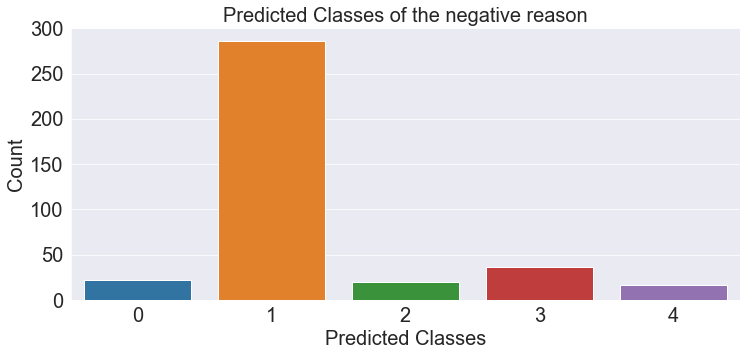

In [102]:
plt.figure(figsize=(12,5))
sns.countplot(predictions)
plt.title('Predicted Classes of the negative reason', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Predicted Classes", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text major ticklabel objects>)

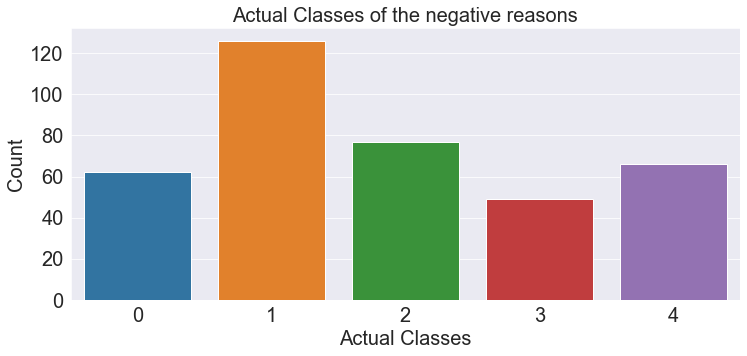

In [101]:
plt.figure(figsize=(12,5))
sns.countplot(y_test1)
plt.title('Actual Classes of the negative reasons', fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xlabel("Actual Classes", fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [78]:
#Answer the research question stated above based on the outputs of your first model. Describe the results of the analysis
#and discuss your interpretation of the results. Explain how each party is viewed in the public eye based on the sentiment value.
#For the second model, based on the model that worked best, provide a few reasons why your model may fail to predict the correct
#negative reasons. Back up your reasoning with examples from the test sets. For both models, suggest one way you can improve 
#the accuracy of your models

#### Research Question “What can public opinion on Twitter tell us about the US political landscape in 2020?”

#### Bonus Plot

In [90]:
neg_election_df[(neg_election_df.Affiliation=="Democrat") | (neg_election_df.Affiliation=="Republican")]

,text,sentiment,negative_reason,text_clean,Affiliation,length,Pred_tfidf,Pred_wf
0,"b'@robreiner so afraid of Nov, Dec, and Jan! E...",0,covid19,"[afraid, nov, dec, jan, bidenharris, winfrump,...",Democrat,131,0,0
2,b'RT @WalidPhares: Uber Timing: after #Biden a...,0,covid19,"[uber, timing, biden, advisor, pressure, brazi...",Democrat,143,0,0
5,accelerating. &amp; rising when all #Americans...,0,discrimination,"[accelerating, rising, american, killed, trump...",Republican,97,0,0
6,b'@realDonaldTrump 961 dead Americans in one d...,0,discrimination,"[dead, american, day, number, died, benghazi, ...",Republican,135,0,0
8,b'@charliekirk11 only reason @realdonaldtrump ...,0,corruption,"[reason, rally, losing]",Republican,132,0,0
...,...,...,...,...,...,...,...,...
2538,"b""@atrupar It's stunning that the #MAGA doesn'...",0,corruption,"[stunning, maga, doesnt, realize, stupid]",Republican,133,0,0
2539,b'#Trump has been forced to hold a rally in fr...,0,discrimination,"[rump, forced, hold, rally, front, small, soci...",Republican,130,0,0
2540,b'#TrumpsDeadlySins is unlimited from #covid t...,0,others,"[rumpsdeadlysins, unlimited, covid, lie, famil...",Republican,131,0,0
2549,b'@DonaldJTrumpJr DUHnnie Jr. lied on Fox when...,0,covid19,"[duhnnie, jr, lied, fox, number, covid, death]",Republican,140,0,0


Text(0.5, 0, 'Negative Reasons and Affiliation')

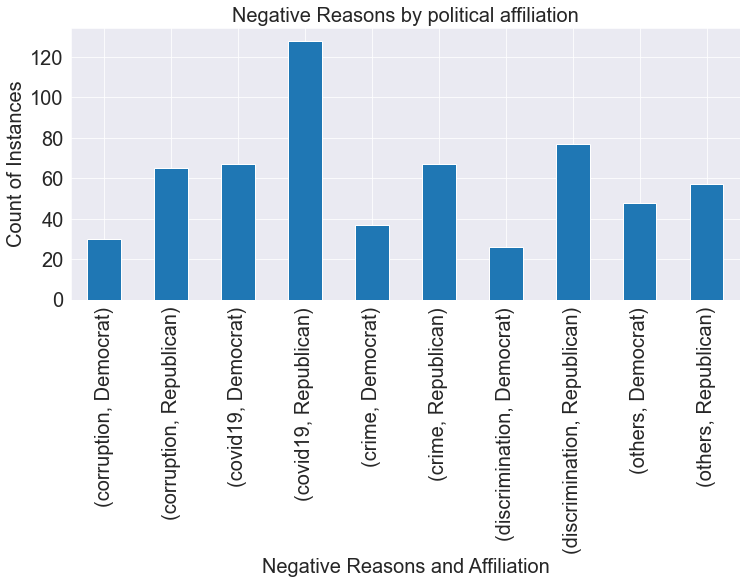

In [92]:
plt.figure(figsize=(12,5))
neg_election_df[(neg_election_df.Affiliation=="Democrat")|(neg_election_df.Affiliation=="Republican")].groupby(['negative_reason','Affiliation']).count()['sentiment'].plot(kind='bar')

plt.ylabel('count', fontsize=15)
plt.title('Negative Reasons by political affiliation', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Count of Instances',fontsize=20)
plt.xlabel('Negative Reasons and Affiliation',fontsize=20)


The public opinion on twitter from the US election dataset reveals the following:    
Both the Republican and Democratic party had tweets that had both positive and negative sentiments affiliated with them;
The Republicans had the majority of negative sentiment tweets affiliated with them;   
Democrats had more of the positive sentiment tweet than republicans by a very small fraction;    
Based on the sentiment value, the Democratic party seemed to be more favored in the public eye than the Republican party  
Most of the tweets had mixed affiliation and other reasons associated with them;  
The Republican party had the most negative sentiment for reasons of corruption,covid19,crime,discrimination and other reasons than the Democratic party

My model may fail to predict the correct negative reasons because:  
High Variance/overfitting in the dataset. The model performed fine predicting the train set but has low cross-validation and test accuracy with the validation and test set;   

From the test set of the dataset, one of the classes had the most prediction than the rest of the classes present in the dataset. it had significantly higher prediction than the other classes. This could be an indication that this class is overpresented in the training set or the entire dataset and as a result, the model predicts that class most of the time. Also, the amount of data used for the negative reason prediction is significantly lower than the number of features in the dataset: this also causes poor performance of models. In addition, the right features/vocabularies that are needed to explain the variance in the data may have been removed during preproceesing of the data and hence may require feature engineeing to be able to utilize them. Also, some underlying assumptions of the model may not be satisified by the dataset; as a result, the model becomes underfit or too simple for the dataset

Seeing that the model is overfit to the training set, improving the model 

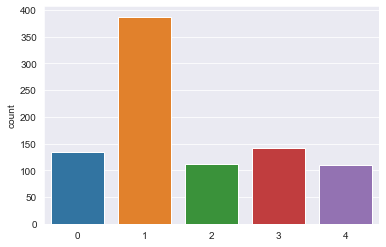

In [287]:
sns.countplot(best_model.predict(tfidf_Xtrain))

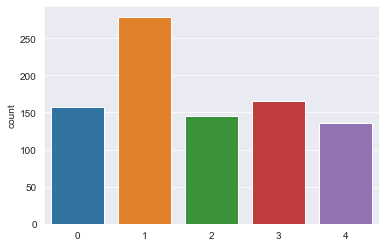

In [288]:
sns.countplot(y_train1)